In [1]:
import os
import numpy as np
import efficientnet.tfkeras
from tensorflow.keras.models import load_model

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]=""

# load model

In [3]:
model_dir ='/media/tohn/SSD/ModelTrainByImages/R2_8/models/B5R2b5_5FP_1FC_fold8_2.h5'
model = load_model(model_dir)
height = width = model.input_shape[1]

In [4]:
# validation
import pandas as pd
base_dir  = '/media/tohn/SSD/Images/Image8/'
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/Validationdf_fold8_2.csv')
validation_dir = os.path.join(base_dir, 'validation')

#Train
train_df = pd.read_csv( '/home/yupaporn/codes/USAI/Traindf_fold8_2.csv')
base_dir0 = '/media/tohn/SSD/Images/Image8/'
os.chdir(base_dir0)
train_dir = os.path.join(base_dir0, 'train')

# Select Data

In [5]:
import pandas as pd
df0 = pd.read_csv (r'/home/yupaporn/codes/USAI/Validationdf_fold8_2.csv')
print(df0 .shape)
dataframe = df0[(df0['Path Crop']!='None' )&(df0['Path Crop']!='Nan')]
# a = df01[df01['Case'].between(1, 10)]
# dataframe = df01[df01['Abs Position']!='P8']
print(dataframe.shape)
print('Normal: ',dataframe[dataframe['Class']=='Normal'].shape)
print('Abnormal: ',dataframe[dataframe['Class']=='Abnormal'].shape)
dataframe.head(5)

(1020, 21)
(1020, 21)
Normal:  (719, 21)
Abnormal:  (301, 21)


,Unnamed: 0,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,...,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,filename
0,0,20,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,10,...,https://irisprodseatraining.blob.core.windows....,233.0,119.0,568.0,512.0,0.234657,0.132937,0.572202,0.569721,AB01 P2 C020.JPG
1,1,20,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,10,...,https://irisprodseatraining.blob.core.windows....,186.0,65.0,593.0,541.0,0.185053,0.073176,0.588968,0.601594,AB01 P1 C020.JPG
2,2,20,P2,P2,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,10,...,https://irisprodseatraining.blob.core.windows....,120.0,132.0,579.0,480.0,0.132000,0.147601,0.634195,0.533333,AB02 P2 C020.JPG
3,3,20,P2,P2,Abnormal,AB03,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,10,...,https://irisprodseatraining.blob.core.windows....,178.0,107.0,256.0,456.0,0.188137,0.119318,0.269598,0.507071,AB03 P2 C020.JPG
4,4,20,P1,P1,Abnormal,AB03,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,10,...,https://irisprodseatraining.blob.core.windows....,253.0,60.0,517.0,727.0,0.258140,0.066793,0.527778,0.808081,AB03 P1 C020.JPG


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 0 to 1009
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1010 non-null   int64  
 1   Case           1010 non-null   int64  
 2   Abs Position   1010 non-null   object 
 3   Sub Position   1010 non-null   object 
 4   Class          1010 non-null   object 
 5   Sub_class      1010 non-null   object 
 6   Path Full      1010 non-null   object 
 7   Path Crop      1010 non-null   object 
 8   Views          1010 non-null   object 
 9   fold           1010 non-null   int64  
 10  tagName        1010 non-null   object 
 11  originalImage  293 non-null    object 
 12  left           293 non-null    float64
 13  top            293 non-null    float64
 14  width          293 non-null    float64
 15  height         293 non-null    float64
 16  Rleft          293 non-null    float64
 17  Rtop           293 non-null    float64
 18  Rwidth  

In [6]:
batch_size = 64
epochs = 10

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      brightness_range=[0.5,1.5],
      shear_range=0.4,
    
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
        dataframe = dataframe,
        directory = train_dir,
        x_col = 'Path Crop',
        y_col = 'Views',
        target_size = (height, width),
        batch_size=batch_size,
        color_mode= 'rgb',
        class_mode='categorical')

#label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 1020 validated image filenames belonging to 5 classes.
{0: 'FP-A', 1: 'FP-B', 2: 'FP-C', 3: 'FP-D', 4: 'FP-E'}


# Prediction

In [7]:
from tensorflow.keras.preprocessing import image
def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    
    return result[0]

#Predict
pred_list = list()
prob_list = list()
img_path=dataframe['Path Crop'].tolist()
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

dataframe['category'] = pred_list
dataframe['Prob'] = prob_list

In [8]:
dataframe.head(5)

,Unnamed: 0,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,...,top,width,height,Rleft,Rtop,Rwidth,Rheight,filename,category,Prob
0,0,20,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,10,...,119.0,568.0,512.0,0.234657,0.132937,0.572202,0.569721,AB01 P2 C020.JPG,FP-A,0.999996
1,1,20,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,10,...,65.0,593.0,541.0,0.185053,0.073176,0.588968,0.601594,AB01 P1 C020.JPG,FP-A,1.000000
2,2,20,P2,P2,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,10,...,132.0,579.0,480.0,0.132000,0.147601,0.634195,0.533333,AB02 P2 C020.JPG,FP-A,1.000000
3,3,20,P2,P2,Abnormal,AB03,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,10,...,107.0,256.0,456.0,0.188137,0.119318,0.269598,0.507071,AB03 P2 C020.JPG,FP-A,0.999999
4,4,20,P1,P1,Abnormal,AB03,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,10,...,60.0,517.0,727.0,0.258140,0.066793,0.527778,0.808081,AB03 P1 C020.JPG,FP-A,1.000000


# Visualization

In [9]:
data_train = dataframe
#เช็คคลาสใน Predicted
pred_class = set(data_train['category'])
print('Predicted : ',len(pred_class))
print(pred_class)
#เช็คคลาสใน Actual
classe = set(data_train['Views'])
print('Actual : ',len(classe))
print(classe)

Predicted :  5
{'FP-B', 'FP-E', 'FP-C', 'FP-A', 'FP-D'}
Actual :  5
{'FP-B', 'FP-E', 'FP-C', 'FP-A', 'FP-D'}


In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix
act = data_train['Views'].array
pred = data_train['category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 92.45098039215686%
              precision    recall  f1-score   support

        FP-A       0.96      0.91      0.94       204
        FP-B       0.85      0.92      0.88       204
        FP-C       0.94      0.91      0.93       204
        FP-D       0.90      0.98      0.94       204
        FP-E       0.98      0.90      0.94       204

    accuracy                           0.92      1020
   macro avg       0.93      0.92      0.92      1020
weighted avg       0.93      0.92      0.92      1020



### Confusion matrix

Text(0.5, 21.5, 'Predicted label')

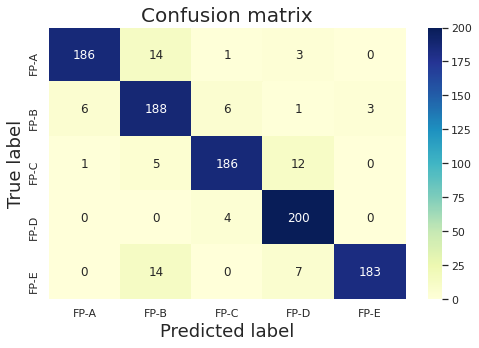

In [11]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)